# Notebook for Plots

In [11]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import time
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def get_plot_dfs(cancer_types, sample_sizes, test_sizes, mse_wp_list):
  df = pd.DataFrame({'cancer':cancer_types, 'Generated Data': sample_sizes, 'Real Data':test_sizes, 'mse': mse_wp_list}).sort_values("Real Data", ascending=False)
  df_plot = df.copy()[:20] #df[(df["sample"]>100)|(df["test"]>100)]
  df_plot["label"] = ["Empirical distribution MSE" for i in range(len(df_plot))]
  df_melt = pd.melt(df_plot, id_vars=['cancer'], value_vars=['Generated Data', 'Real Data']) 
  df_melt["label"] = ["Empirical distribution MSE"for i in range(len(df_melt))]
  return df_plot, df_melt

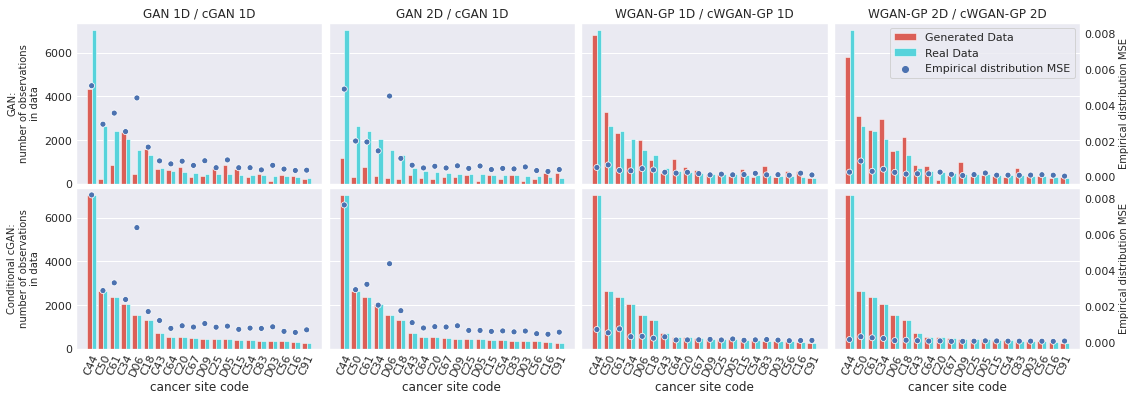

In [0]:
titles = ['GAN 1D / cGAN 1D', 'GAN 2D / cGAN 1D', 'WGAN-GP 1D / cWGAN-GP 1D', 'WGAN-GP 2D / cWGAN-GP 2D']
fig, axes = plt.subplots(figsize=(18, 6), ncols=4, nrows = 2, sharex=True, sharey=True)

fig.subplots_adjust(hspace=0.025, wspace=0.025)
files = [['vanilla1','vanilla2','wgan1','wgan2'], ['c_vanilla1','c_vanilla2','c_wgan1','c_wgan2']]
for j in range(2):
  ax_row = axes[j]
  for i in range(4):
    ax = ax_row[i]
    ax2 = ax.twinx()
    if j==1 or i>0: ax2_prev.get_shared_y_axes().join(ax2_prev, ax2)
    ax2_prev = ax2
    with open('/content/drive/My Drive/ST449 Project/evaluation/' + files[j][i] + '.pickle', 'rb') as handle:
      saved = pickle.load(handle)

    sample = saved['sample']
    mse_within_p, mse_list, sample_sizes, test_sizes, cancer_types = compare_within_site_probs(sample, X_test, conditional = True) 
    plot_mse_list = np.array(mse_list)*np.array(test_sizes)/np.sum(test_sizes)
    df_plot, df_melt = get_plot_dfs(cancer_types, sample_sizes, test_sizes, plot_mse_list)
    sns.set()
    sns.barplot(x = 'cancer', y = 'value', hue = 'variable', data = df_melt,
                palette = 'hls',
                capsize = 0.05,             
                saturation = 8,             
                errcolor = 'gray', errwidth = 2,  
                ci = 'sd',
                zorder=3 ,
                ax = ax, linewidth=0.5
                )
    sns.scatterplot(x = 'cancer', y = 'mse', hue='label', data= df_plot, ax = ax2 ,zorder =2) 

    if j == 0: ax.set_title(titles[i])
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.yaxis.set_tick_params(labelright=False)
    ax.xaxis.set_tick_params(rotation= 65)
    ax2.tick_params(axis=u'both', which=u'both',length=0)
    ax2.grid(False)
    #Remove inside LH y axis labels
    if j == 0:
      ax.set_xlabel("")
    else:
      ax.set_xlabel("cancer site code")

    if i > 0: 
      ax.set_ylabel("")
    else:
      if j==0:
        ax.set_ylabel("GAN:\nnumber of observations\nin data", fontsize=10,multialignment='center')
      else:
        ax.set_ylabel("Conditional cGAN:\nnumber of observations\nin data", fontsize=10,multialignment='center')
    #Remove inside RH y axis labels and ticks
    #Add combined legend
    if i < 3:
      ax2.yaxis.set_tick_params(labelright=False)
      ax2.set_ylabel("")
      ax.get_legend().remove()
      ax2.legend().remove()
    elif j ==1:
      ax.get_legend().remove()
      ax2.legend().remove()
      ax2.set_ylabel("Empirical distribution MSE", fontsize=10,multialignment='center')
    else:
      ax.legend().remove()
      plot, labels = ax.get_legend_handles_labels()
      plot2, labels2 = ax2.get_legend_handles_labels()
      ax2.legend(plot + [plot2[1]], labels + [labels2[1]], loc=0, title='')
      ax2.set_ylabel("Empirical distribution MSE", fontsize=10,multialignment='center')


In [0]:
with open('/content/drive/My Drive/ST449 Project/evaluation/''.pickle', 'rb') as handle:
      saved = pickle.load(handle)

[<BarContainer object of 20 artists>,
 <BarContainer object of 20 artists>,

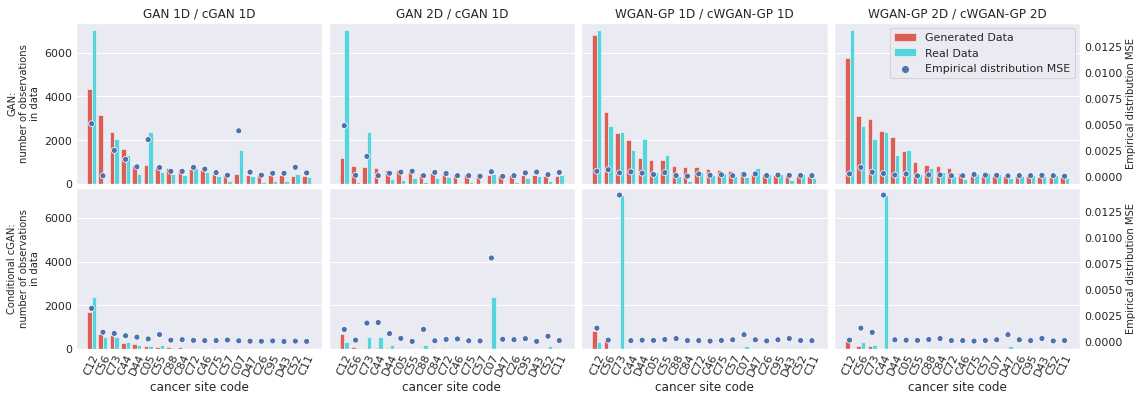

In [0]:
titles = ['GAN 1D / cGAN 1D', 'GAN 2D / cGAN 1D', 'WGAN-GP 1D / cWGAN-GP 1D', 'WGAN-GP 2D / cWGAN-GP 2D']
fig, axes = plt.subplots(figsize=(18, 6), ncols=4, nrows = 2, sharex=True, sharey=True)

fig.subplots_adjust(hspace=0.025, wspace=0.025)
files = [['vanilla1','vanilla2','wgan1','wgan2'], ['c_vanilla1','c_vanilla2','c_wgan1','c_wgan2']]
for j in range(2):
  ax_row = axes[j]
  for i in range(4):
    ax = ax_row[i]
    ax2 = ax.twinx()
    if j==1 or i>0: ax2_prev.get_shared_y_axes().join(ax2_prev, ax2)
    ax2_prev = ax2
    with open('/content/drive/My Drive/ST449 Project/evaluation/' + files[j][i] + '.pickle', 'rb') as handle:
      saved = pickle.load(handle)

    mse_list, sample_sizes, test_sizes, cancer_types = saved['within_prob']
    plot_mse_list = np.array(mse_list)*np.array(test_sizes)/np.sum(test_sizes)
    df_plot, df_melt = get_plot_dfs(cancer_types, sample_sizes, test_sizes, plot_mse_list)

    sns.set()
    sns.barplot(x = 'cancer', y = 'value', hue = 'variable', data = df_melt,
                palette = 'hls',
                capsize = 0.05,             
                saturation = 8,             
                errcolor = 'gray', errwidth = 2,  
                ci = 'sd',
                zorder=3 ,
                ax = ax, linewidth=0.5
                )
    sns.scatterplot(x = 'cancer', y = 'mse', hue='label', data= df_plot, ax = ax2 ,zorder =2) 

    if j == 0: ax.set_title(titles[i])
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.yaxis.set_tick_params(labelright=False)
    ax.xaxis.set_tick_params(rotation= 65)
    ax2.tick_params(axis=u'both', which=u'both',length=0)
    ax2.grid(False)
    #Remove inside LH y axis labels
    if j == 0:
      ax.set_xlabel("")
    else:
      ax.set_xlabel("cancer site code")

    if i > 0: 
      ax.set_ylabel("")
    else:
      if j==0:
        ax.set_ylabel("GAN:\nnumber of observations\nin data", fontsize=10,multialignment='center')
      else:
        ax.set_ylabel("Conditional cGAN:\nnumber of observations\nin data", fontsize=10,multialignment='center')
    #Remove inside RH y axis labels and ticks
    #Add combined legend
    if i < 3:
      ax2.yaxis.set_tick_params(labelright=False)
      ax2.set_ylabel("")
      ax.get_legend().remove()
      ax2.legend().remove()
    elif j ==1:
      ax.get_legend().remove()
      ax2.legend().remove()
      ax2.set_ylabel("Empirical distribution MSE", fontsize=10,multialignment='center')
    else:
      ax.legend().remove()
      plot, labels = ax.get_legend_handles_labels()
      plot2, labels2 = ax2.get_legend_handles_labels()
      ax2.legend(plot + [plot2[1]], labels + [labels2[1]], loc=0, title='')
      ax2.set_ylabel("Empirical distribution MSE", fontsize=10,multialignment='center')


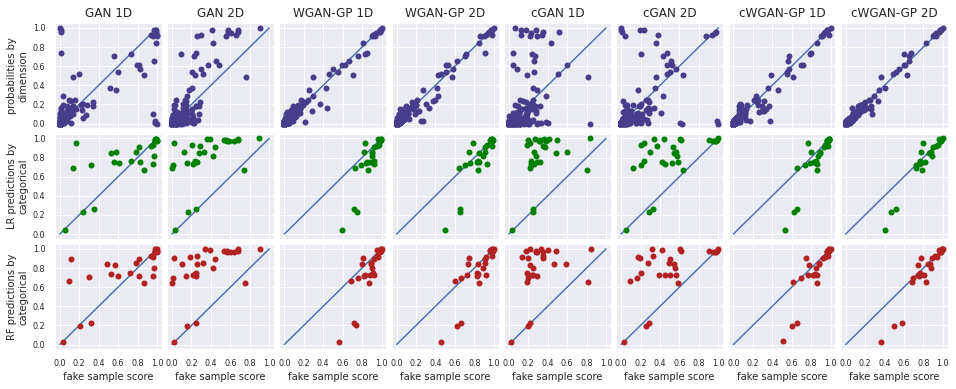

In [0]:
import matplotlib.pyplot as plt
titles = ['GAN 1D', 'GAN 2D', 'WGAN-GP 1D', 'WGAN-GP 2D','cGAN 1D', 'cGAN 2D', 'cWGAN-GP 1D', 'cWGAN-GP 2D']
labels = ['probabilities by\ndimension', 'LR predictions by\ncategorical', 'RF predictions by\ncategorical']
fig, ax = plt.subplots(figsize=(16, 6), ncols=8, nrows = 3, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, file in enumerate(['vanilla1','vanilla2','wgan1','wgan2', 'c_vanilla1', 'c_vanilla2', 'c_wgan1', 'c_wgan2']):
  with open('/content/drive/My Drive/ST449 Project/evaluation/' + file + '.pickle', 'rb') as handle:
    saved = pickle.load(handle)

  #get data to plot
  mse_prob_lists  = saved['prob']
  mse_lr_sample = saved['accuracy'][0]
  mse_lr_test = saved['accuracy'][1]
  mse_rf_sample = saved['accuracy'][2]
  mse_rf_test = saved['accuracy'][3]

  ax[0,i].set_title(titles[i])
  sns.set()
  sns.scatterplot(mse_prob_lists[0], mse_prob_lists[1], ax = ax[0][i], linewidth=0, c = ["darkslateblue"],zorder=2)
  sns.scatterplot(mse_lr_sample, mse_lr_test, ax = ax[1][i], linewidth=0, c = ["green"], zorder=2)
  sns.scatterplot(mse_rf_sample, mse_rf_test, ax = ax[2][i], linewidth=0, c = ["firebrick"], zorder=2) 

  ax[2][i].set_xlabel('fake sample score', fontsize=10, multialignment='center')

  for j in range(3):
    ax[j][i].grid(zorder=-1)
    plt.xticks(np.arange(0, 2, 0.2))
    ax[j][i].tick_params(axis='both', which='major', labelsize=8)
    plt.yticks(np.arange(0, 2, 0.2))
    ax[j][i].plot(np.linspace(0, 1), [i for i in np.linspace(0, 1)], zorder=1)
    ax[j][0].set_ylabel(labels[j], fontsize=10, multialignment='center')


In [0]:
def plot_loss_grads2(d_loss_list, accuracy_list, g_loss_list, d_grad_list, g_grad_list, ax):
  ax[0].plot(d_loss_list, label = "D")
  ax[0].plot(g_loss_list, label = "G")
  ax[0].plot(accuracy_list, label = "D Accuracy")
  ax[0].legend(loc="upper right")
  ax[0].title.set_text("Loss")

  ax[1].plot(d_grad_list, label = "D")
  ax[1].plot(g_grad_list, label = "G")
  ax[1].legend(loc="upper right")
  ax[1].title.set_text("Gradients")

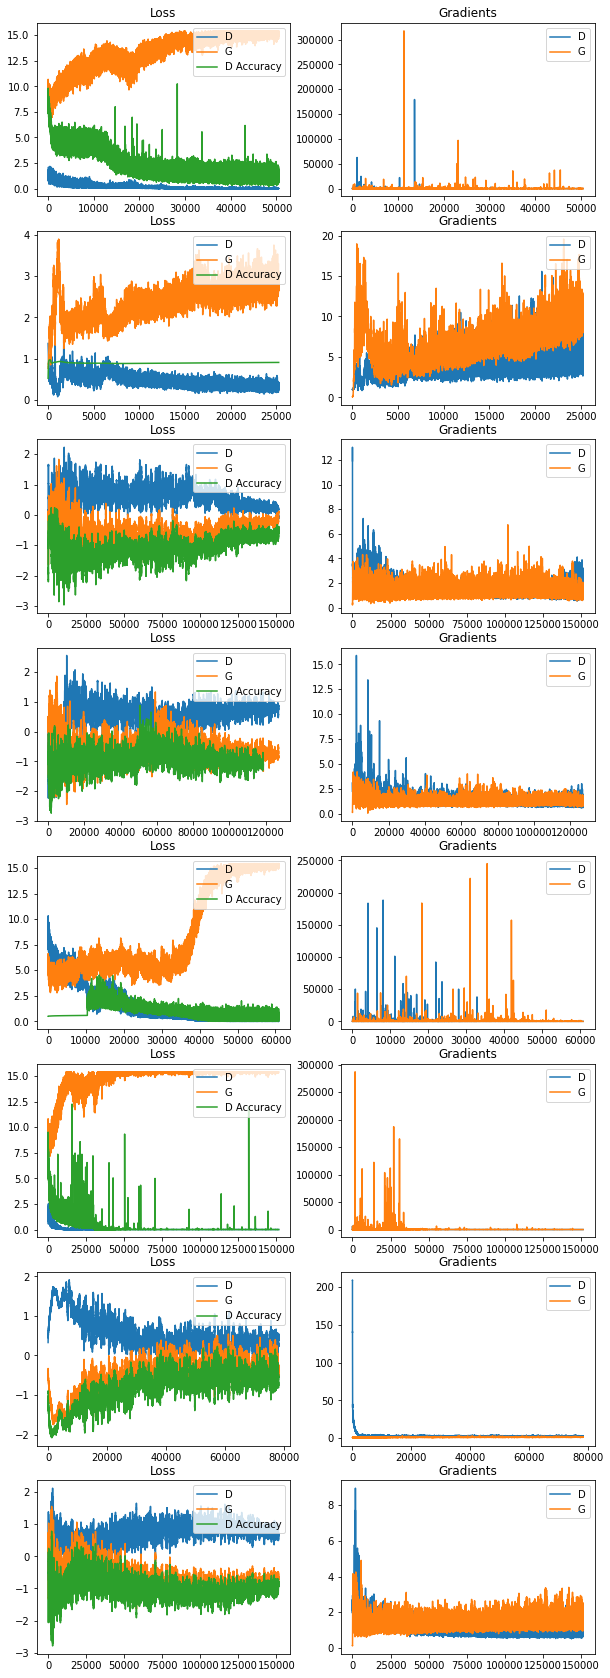

In [33]:
checkpoints = ['vanilla-4/','vanilla-3/','wgan-2/','wgan-1/','c-vanilla-3/','c-vanilla-2d2/','c-wgan-3/','c-wgan-2d2/']
files = [['model_lists2'],['model_lists'],['model_lists'],['model_lists','model_lists2','model_lists3'],
         ['model_lists','model_lists2'],['model_lists'],['model_lists3'],['model_lists']]

fig, ax = plt.subplots(nrows = 8, ncols = 2, figsize = (10, 30))

for i, checkpoint in enumerate(checkpoints):
  acc = []
  d_loss = []
  d_r_loss = []
  d_f_loss = []
  g_loss = []
  d_grads = []
  g_grads = []
  if len(files[i]) > 1:
    for j in range(len(files[i])):
      with open('/content/drive/My Drive/ST449 Project/checkpoints/' + checkpoints[i] + files[i][j] +'.pickle', 'rb') as handle:
        saved = pickle.load(handle)
      
      acc += saved['D Accuracy']
      d_grads += saved['D Grads']
      d_loss += saved['D Loss']

      try:
        d_f_loss += saved['D Fake Loss'] 
      except: 
        d_f_loss += saved['D Loss']

      try: 
        d_r_loss += saved['D Real Loss'] 
      except: 
        d_r_loss += saved['D Accuracy']
      g_grads += saved['G Grads']
      g_loss += saved['G Loss']
  else:
    with open('/content/drive/My Drive/ST449 Project/checkpoints/' + checkpoints[i] + files[i][0] +'.pickle', 'rb') as handle:
      saved = pickle.load(handle)
    acc += saved['D Accuracy']
    d_grads += saved['D Grads']
    d_loss += saved['D Loss']
    try: d_f_loss += saved['D Fake Loss'] 
    except: d_f_loss += saved['D Loss']
    try: d_r_loss += saved['D Real Loss'] 
    except: d_r_loss += saved['D Accuracy']
    g_grads += saved['G Grads']
    g_loss += saved['G Loss']

  plot_loss_grads2(d_f_loss, d_r_loss, g_loss, d_grads, g_grads, ax[i])

